In [54]:
import numpy as np
class LogisticRegressionScratch:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Calculate accuracy percentage between two lists
    def accuracy_metric(self, actual, predicted):
        actual=actual.to_numpy()
        predicted= predicted
        actual= actual.tolist()
        predicted=predicted.tolist()
        correct = 0
        for i in range(len(actual)):
             if actual[i] == predicted[i]:
                     correct += 1
        return correct / float(len(actual)) * 100.0



In [55]:
import pandas as pd

In [56]:
# Reading the data from csv hearder need to set as there are no header in the dataset. Also delimetor is ; so set the same. 
df=pd.read_csv('D:\MyDoc\PhDBennett\MachineLearning\Lab4\Lab4\divorce+predictors+data+set\divorce.csv', delimiter=';')

In [57]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [59]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [60]:
print('Data type of Y', type(Y))
print('Shape of Y', np.shape(Y))
print('Data type of X', type(X))
print('Shape of X', np.shape(X))

Data type of Y <class 'pandas.core.series.Series'>
Shape of Y (170,)
Data type of X <class 'pandas.core.frame.DataFrame'>
Shape of X (170, 54)


In [61]:
# in order to split the dataset we are calling sklearn split in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, random_state=42)

In [62]:
lr_model = LogisticRegressionScratch()

In [63]:
lr_model.fit(X_train, y_train)

In [64]:
y_predict_test=lr_model.predict(X_test)
y_predict_test

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0])

In [65]:
y_predict_train=lr_model.predict(X_train)
y_predict_train

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [66]:
train_accuracy = lr_model.accuracy_metric(y_train, y_predict_train)
print("Training Accuracy: ", train_accuracy)

Training Accuracy:  97.91666666666666


In [67]:
accuracy = lr_model.accuracy_metric(y_test, y_predict_test)
print("Testing Accuracy: ", accuracy)


Testing Accuracy:  96.15384615384616


In [17]:
# importing module
from sklearn.linear_model import LogisticRegression
# creating object of LinearRegression class
LR = LogisticRegression()
# fitting training data
LR.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_predict = LR.predict(X_test)
y_predict

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [19]:
print("Training Accuracy: ", LR.score(X_train, y_train))
print("Test Accuracy: ", LR.score(X_test, y_test))

Training Accuracy:  1.0
Test Accuracy:  1.0


In [20]:
from sklearn.metrics import classification_report

In [21]:
target_names = ['Divorced', 'Not Divorced']

In [22]:
print(classification_report(y_test,y_predict, target_names=target_names))

              precision    recall  f1-score   support

    Divorced       1.00      1.00      1.00        11
Not Divorced       1.00      1.00      1.00        15

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [68]:
# for scracth made function
print(classification_report(y_test,y_predict_test, target_names=target_names))

              precision    recall  f1-score   support

    Divorced       0.92      1.00      0.96        11
Not Divorced       1.00      0.93      0.97        15

    accuracy                           0.96        26
   macro avg       0.96      0.97      0.96        26
weighted avg       0.96      0.96      0.96        26



In [23]:
from sklearn.metrics import confusion_matrix

In [70]:
cm = confusion_matrix(y_test, y_predict)

In [71]:
# confusionmatrix for scracth made model
cm_scrtch = confusion_matrix(y_test, y_predict_test)

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

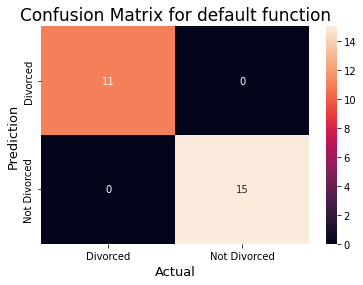

In [73]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Divorced','Not Divorced'],
            yticklabels=['Divorced','Not Divorced'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for default function',fontsize=17)
plt.show()

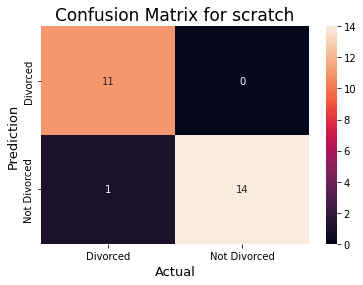

In [74]:
sns.heatmap(cm_scrtch,
            annot=True,
            fmt='g',
            xticklabels=['Divorced','Not Divorced'],
            yticklabels=['Divorced','Not Divorced'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for scratch',fontsize=17)
plt.show()